# Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, explained_variance_score, mean_absolute_error
import pickle

# Opening The Data

In [2]:
data = pd.read_csv('/Users/waranthornchansawang/Desktop/NewbieTiger_YIC_2019/FWCR_data_CSV.csv')
data.head(10)

,date,temperature,humidity,windspeed,people
0,1/6/2019,36,65,21,108
1,2/6/2019,36,70,15,123
2,3/6/2019,36,66,17,77
3,4/6/2019,36,72,10,80
4,5/6/2019,35,69,15,74
5,6/6/2019,36,68,17,87
6,7/6/2019,34,66,18,97
7,8/6/2019,34,66,19,112
8,9/6/2019,34,67,13,135
9,10/6/2019,34,70,13,68


# Pre-Processing The Data

In [3]:
data['date'] = data['date'].apply(pd.to_datetime)
data['year'] = [i.year for i in data['date']]
data['month'] = [i.month_name()[0:3] for i in data['date']]
data['day'] = [i.day_name()[0:3] for i in data['date']]

# Visualising The Data

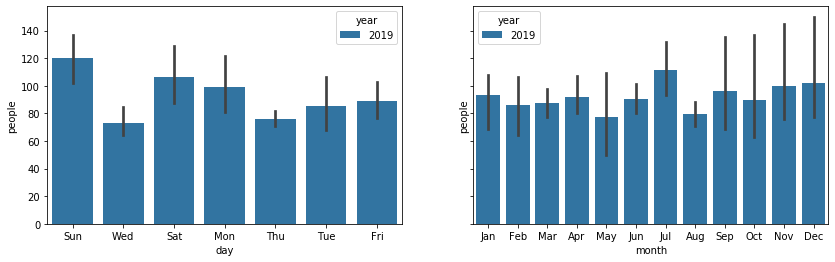

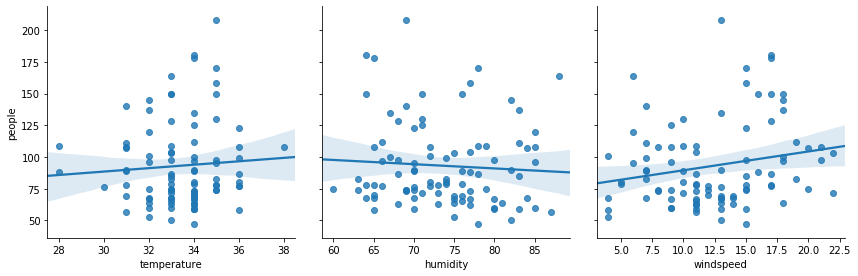

In [4]:
figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14,4), sharey=True)
bp1 = sns.barplot(data=data, x='day', y='people', hue='year', ax=ax1)
bp2 = sns.barplot(data=data, x='month', y='people', hue='year', ax=ax2)
pp = sns.pairplot(data=data, y_vars=['people'], x_vars=['temperature', 'humidity', 'windspeed'], kind='reg', height=4)

# Training the model

In [5]:
x = data[['temperature', 'humidity', 'windspeed']]
y = data['people']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=1)
classifier = xgb.sklearn.XGBClassifier(nthread=-1, seed=1)
classifier.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=-1, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=1,
              silent=None, subsample=1, verbosity=1)

# Evaluating The Model

R^2 score: -0.11
MAE score: 30.80
EVS score: -0.00


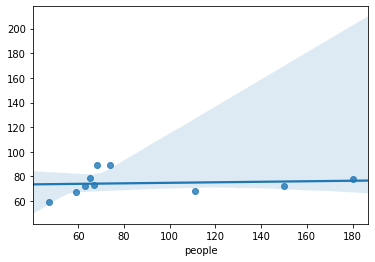

In [6]:
predictions = classifier.predict(X_test)
print(f'R^2 score: {r2_score(y_true=y_test, y_pred=predictions):.2f}')
print(f'MAE score: {mean_absolute_error(y_true=y_test, y_pred=predictions):.2f}')
print(f'EVS score: {explained_variance_score(y_true=y_test, y_pred=predictions):.2f}')
rp = sns.regplot(x=y_test, y=predictions)

In [7]:
with open('model/FWCR_model', 'wb') as file:
    pickle.dump(classifier, file)